### CAMERA CALIBRATION



In [0]:
import numpy as np
import cv2
import scipy.io
import os
from numpy.linalg import norm
from matplotlib import pyplot as plt
from numpy.linalg import det
from numpy.linalg import inv
from scipy.linalg import rq
from numpy.linalg import svd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

####This part of the code lets you use files from your Google Drive account
####You need not use this if you are not using Google Colaboratory
####Running code on Google Colab

(a) Make a folder on Google Drive, upload this file and all the data files provided to you into the same folder

(b) The last part of the URL will serve as the "folder_id" in the line below

If you are unsure, you can read further here : https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

In [0]:
folder_id = ' ' # Enter the last part of the URL of the Google Drive folder here

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': '\'' + folder_id + "\' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
  
os.chdir(local_download_path)

title: rubik_3D_pts.mat, id: 16Y381bPAE6EgPZg7JPO_Ntd6MOe_nlaJ
downloading to /root/data/rubik_3D_pts.mat
title: projective_camera.pdf, id: 1d7_rg4bMCsvNPcVnekUVzfSzuMmZKup2
downloading to /root/data/projective_camera.pdf
title: rubik_cube.jpg, id: 1VUp5o38wc9YPFP6T5QFY1u47atr4OqVH
downloading to /root/data/rubik_cube.jpg
title: rubik_2D_pts.mat, id: 1-sjlJSotjfdWpFt3txQFUHSbNP6vkorb
downloading to /root/data/rubik_2D_pts.mat
title: pt_corres.mat, id: 18r9N31S45oS0CEf59aeaxzmYUCoOYn7W
downloading to /root/data/pt_corres.mat
title: calibration_assignment_main.ipynb, id: 1mH_GgUM-3cxZChm4wLR1q3Dh6R4d4xhl
downloading to /root/data/calibration_assignment_main.ipynb
title: CalibrationAssignment.docx, id: 15bjHkQgRMALz4TE4as-P9fQUVbMSoW4X
downloading to /root/data/CalibrationAssignment.docx


####PART 1: Given corresponding 2d points in the image and 3d coordinates with known extrinsics, estimate the camera intrinsics of the form given in the CalibrationAssignment.docx

In [0]:
# Code for Part 1 starts here

# Step 1: Load the data file pt_corres.mat
data_part1 = scipy.io.loadmat('pt_corres.mat')
cam_pts_3D = data_part1['cam_pts_3D']         # Load the 3d points
pts_2D = data_part1['pts_2D']                 # Load the corresponding 2d points

print pts_2D.shape
print cam_pts_3D.shape

# Step 2: Write your code here to compute the camera intrinsics 

#Obtain the transpose of two matrices
pts_2DT=np.transpose(pts_2D)
cam_pts_3DT=np.transpose(cam_pts_3D)

one=np.ones((28,1))

#Matrix AT is composed of three columns with the first column being the x values of the image points, 
#second column being the y values of the image points and the third column being zeros 

A = np.hstack((pts_2DT,one))
AT=np.transpose(A)

#Compose matrix BT such that 1st column is X/Z, 2nd column is Y/Z, 3rd column is one
x1=np.empty((28,1))
x2=np.empty((28,1))
for i in range(0,28):
  x1[i]=cam_pts_3DT[i][0]/cam_pts_3DT[i][2]
  x2[i]=cam_pts_3DT[i][1]/cam_pts_3DT[i][2]

B=np.hstack((x1,x2,one))
BT=np.transpose(B)
Binv = np.linalg.pinv(BT)
print("K", np.dot(AT,Binv))
# Code for Part 1 ends here

(2, 28)
(3, 28)
('K', array([[ 3.38625072e+03,  1.27159260e+01,  8.52916937e+02],
       [ 1.85319235e+00,  3.42886718e+03,  6.27551184e+02],
       [-1.11022302e-15,  2.99760217e-15,  1.00000000e+00]]))


####PART 2: Given 2d points on the image and corresponding 3d points in the world-coordinate system, estimate both intrinsics and extrinsics. You need to fill in the code for the function calibrate() in calib_DLT.ipynb before running the cell below

(28, 4)
P =  [[ 2.24468524e-01  2.82252106e-02 -4.46581005e-02  6.47418343e-01]
 [ 3.13049122e-03 -1.77345292e-01 -1.43567369e-01  6.89636308e-01]
 [-8.96065658e-07  2.74079257e-05 -5.24236468e-05  1.17447045e-03]]
K =  [[ 3.80781877e+03 -8.16178109e+00  8.32399977e+02]
 [ 0.00000000e+00  3.78129094e+03  7.60763925e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
R =  [[ 0.99974008  0.02211926 -0.00552403]
 [ 0.01704062 -0.88594483 -0.46347748]
 [-0.01514576  0.46326288 -0.88609148]]
t =  [-1.46772505 -0.91125501 19.85150442]
('Reprojection Error', 0.4413167951853344)


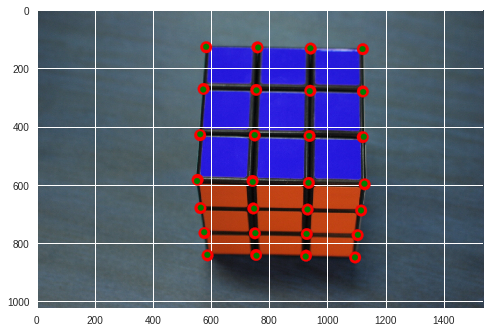

In [0]:

def calibrate(x,X):
  '''
  This function computes camera projection matrix from 3D scene points
  and corresponding 2D image points with the Direct Linear Transformation (DLT).
  
  Usage:
  P = calibrate(x, X)
  
  Input:
  x: 2xn image points
  X: 3xn scene points
  
  Output:
  P: 3x4 camera projection matrix
  
  '''
  
  # Your code goes here
  
  # Hint 1: Convert to homogeneous coordinates first
  # Hint 2: np.hstack and np.vstack are useful functions
  
  # Warning: The svd function from Numpy returns U, Sigma and V_transpose (not V, unlike Matlab)
  
  
  xt=np.transpose(x)
  Xt=np.transpose(X)
  #print Xt
  #print xt
    
  Xt=np.hstack((Xt,np.ones((28,1))))
  print Xt.shape
  zero4=np.array((0,0,0,0))
  
  M=np.array((56,12))
  for i in range(0,28):
    A=np.hstack((zero4,-Xt[i],xt[i][1]*Xt[i]))
    B=np.hstack((Xt[i],zero4,-xt[i][0]*Xt[i]))
    A=np.reshape(A,(1,12))
    B=np.reshape(B,(1,12))
    if i == 0:
      M=np.vstack((A,B))
     
    else:
      M=np.vstack((M,A,B))
      
  u, s, vtranspose = np.linalg.svd(M)
  v=np.transpose(vtranspose)
  p= v[:,11]
  
  
  P=p.reshape((3,4))
  return P

#######################################################################################################################################################################################################

def P_to_KRt(P):
  '''
  
  This function computes the decomposition of the projection matrix into intrinsic parameters, K, and extrinsic parameters Q (the rotation matrix) and t (the translation vector)
  
  Usage:
  K, Q, t = P_to_KRt(P)
  
  Input: 
  P: 3x4 projection matrix
  
  Outputs:
  K: 3x3 camera intrinsics
  Q: 3x3 rotation matrix (extrinsics)
  t: 3x1 translation vector(extrinsics)
  
  '''
  
  M = P[0:3,0:3]
  
  R, Q = rq(M)
    
  K = R/float(R[2,2])
  
  if K[0,0] < 0:
    K[:,0] = -1*K[:,0]
    Q[0,:] = -1*Q[0,:]
    
  if K[1,1] < 0:
    K[:,1] = -1*K[:,1]
    Q[1,:] = -1*Q[1,:]
  
  if det(Q) < 0:
    print 'Warning: Determinant of the supposed rotation matrix is -1'
  
  P_3_3 = np.dot(K,Q)
  
  P_proper_scale = (P_3_3[0,0]*P)/float(P[0,0])
  
  t = np.dot(inv(K), P_proper_scale[:,3])
  
  return K, Q, t

#######################################################################################################################################################################################################

# Code for Part 2 starts here

# Step 1 : Load the data files rubik_2D_pts.mat and rubik_3d_pts.mat

pts_3d = scipy.io.loadmat('rubik_3D_pts.mat')['pts_3d'] # 3D points in the world-coordinate system with one of the corners of the Rubik's cube as the origin; side of each smaller cube = 1 unit
pts_2d = scipy.io.loadmat('rubik_2D_pts.mat')['pts_2d'] # The corresponding 2D points on the image rubik_cube.jpg



# Step 2: Get the camera calibration matrix P
  
P = calibrate(pts_2d, pts_3d)     # You need to fill in the code for this function before you execute this part of the code

print 'P = ', P 

# Step 3: Use the function P_to_KRt (already written for you) to decompose P into intrinsics (K) and extrinsics (R and t)
[K, R, t] = P_to_KRt(P)

print 'K = ', K
print 'R = ', R
print 't = ', t
Xt=np.transpose(pts_3d)
Xt=np.hstack((Xt,np.ones((28,1))))
X_=np.transpose(Xt)

# Write code here to compute the average reprojection error (averaged over the 28 points given)
xnew=np.dot(P,X_)
xnewt=np.transpose(xnew)
x1=np.empty((28,1))
x2=np.empty((28,1))
for i in range(0,28):
  x1[i]=xnewt[i][0]/xnewt[i][2]
  x2[i]=xnewt[i][1]/xnewt[i][2]

x_proj=np.hstack((x1,x2))
xt=np.transpose(pts_2d)
sumerr=0
for i in range(0,28):
  sumerr+=np.square(xt[i][0]-x_proj[i][0])+np.square(xt[i][1]-x_proj[i][1])
reproj_err=np.sqrt(sumerr)/28
print("Reprojection Error", reproj_err)




# Display the given 2D points and the reprojected 2D points on the Rubik's Cube image provided
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
img=cv2.imread("rubik_cube.jpg")
xorg=xt[:,0]
yorg=xt[:,1]
xproj=x_proj[:,0]
yproj=x_proj[:,1]
for xx,yy in zip(xorg,yorg):
    circ = Circle((xx,yy),20,color='r')
    ax.add_patch(circ)
    
for xx,yy in zip(xproj,yproj):
    circ = Circle((xx,yy),10,color='g')
    ax.add_patch(circ)
    
ax.imshow(img)    

# Code for Part 2 ends here

In [0]:
.